# Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
plt.style.use('default')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# Add 'count' column for aggregation
df['count'] = 1
# Set the index to the 'login_time'
df.set_index('login_time', inplace=True)
# Inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [5]:
df.head(3)

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1


In [6]:
# Aggregate counts into 15-minute intervals
df_agg = df.resample('0.25H').sum()
df_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


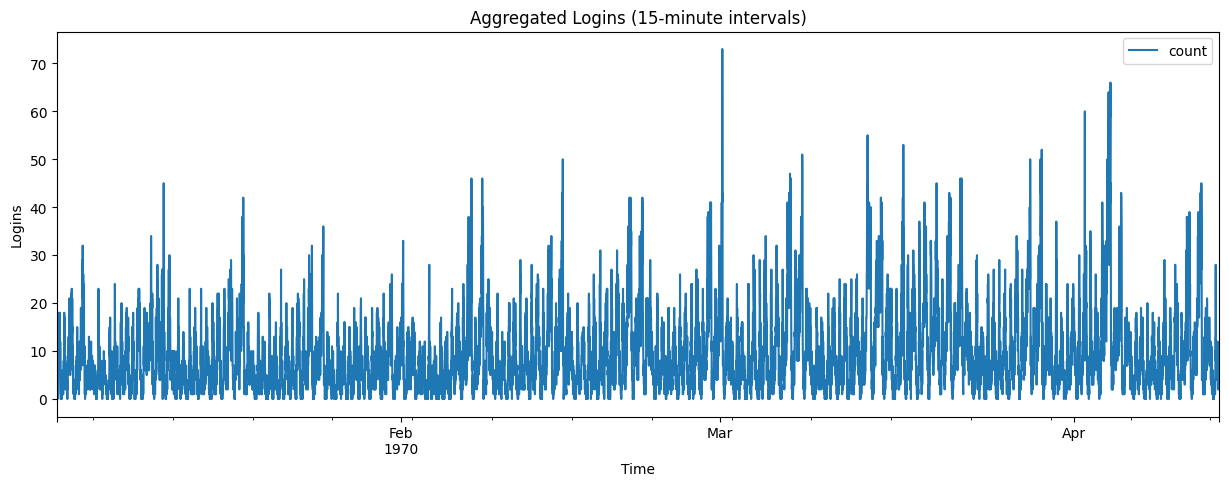

In [200]:
ax = df_agg.plot(figsize=(15,5))
ax.set_xlabel('Time')
ax.set_ylabel('Logins')
ax.set_title('Aggregated Logins (15-minute intervals)')
plt.savefig('./figures/part1-plot-15m.png')
plt.show()

While it's nice to visualize all of the data, this visual isn't very helpful in determining cycles or trends. 

It's also worth noting there's ~3.5 months of data, so not enough to confidently predict seasonality.

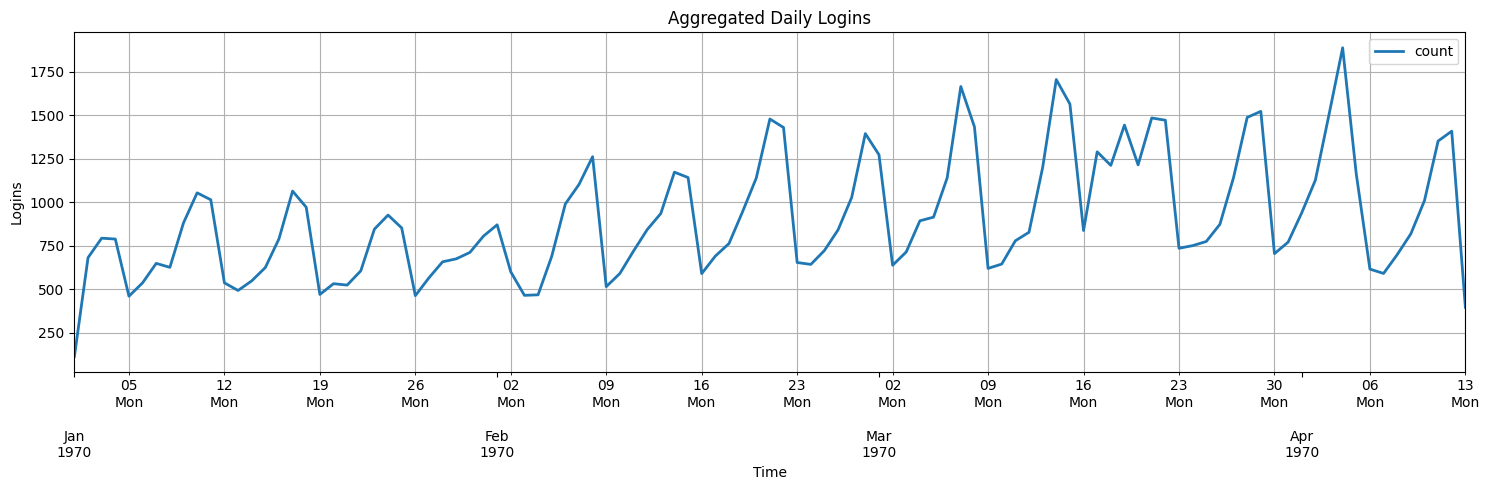

In [201]:
ax = df_agg.resample('D').sum().plot(linewidth=2, figsize=(15,5))

# https://stackoverflow.com/questions/12945971/pandas-timeseries-plot-setting-x-axis-major-and-minor-ticks-and-labels
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax.set_xlabel('Time')
ax.set_ylabel('Logins')
ax.set_title('Aggregated Daily Logins')
plt.tight_layout()
plt.savefig('./figures/part1-plot-1d.png')
plt.show()

The least number of logins seem to occur on Mondays. The trend was increasing, but the last week reported seems lower than normal.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the
observation
    c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Answer

1. The key metric I would choose would be **total trips between cities**. This metric compared with the total intercity trips before the experiement will determine if there is a statistically significant increase.

2. Experiment design for reimbursing toll costs affect on inter-city trips.
    a. Implement, 
    b. Measure the trips, 
    c. The null hypothesis is that the reimbursement incentive will have no affect.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Data description

* `city`: city this user signed up in
* `phone`: primary device for this user
* `signup_date`: date of account registration; in the form ‘YYYYMMDD’
* `last_trip_date`: the last time this user completed a trip; in the form ‘YYYYMMDD’
* `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
* `avg_rating_by_driver`: the rider’s average rating over all of their trips
* `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
* `surge_pct`: the percent of trips taken with surge multiplier > 1
* `avg_surge`: The average surge multiplier over all of this user’s trips
* `trips_in_first_30_days`: the number of trips this user took in the first 30 days after
signing up
* `ultimate_black_user`: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* `weekday_pct`: the percent of the user’s trips occurring during a weekday

### 1. Exploratory Data Analysis

In [203]:
df_raw = pd.read_json('ultimate_data_challenge.json')
df_raw.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [204]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [205]:
df_raw.isnull().sum() / len(df_raw)

city                      0.00000
trips_in_first_30_days    0.00000
signup_date               0.00000
avg_rating_of_driver      0.16244
avg_surge                 0.00000
last_trip_date            0.00000
phone                     0.00792
surge_pct                 0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
avg_dist                  0.00000
avg_rating_by_driver      0.00402
dtype: float64

In [206]:
df_raw[df_raw['avg_rating_of_driver'].isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


<AxesSubplot:>

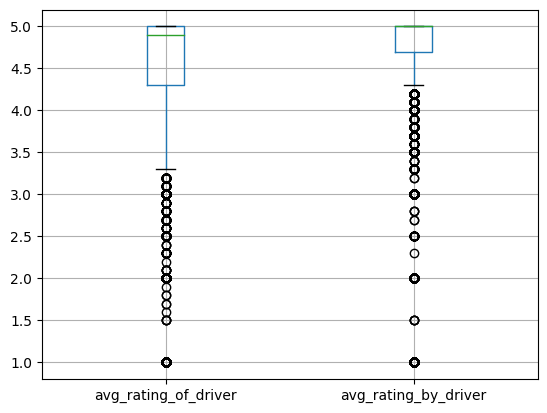

In [207]:
df_raw.boxplot(['avg_rating_of_driver', 'avg_rating_by_driver'])

In [208]:
df_raw.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [209]:
df_raw['avg_rating_of_driver'].fillna(df_raw['avg_rating_of_driver'].median(), inplace=True)
df_raw['avg_rating_by_driver'].fillna(df_raw['avg_rating_by_driver'].median(), inplace=True)

In [210]:
df = df_raw.dropna()
df.reset_index(drop=True, inplace=True)

In [211]:
print(f"Remaining observed rides: {len(df)/len(df_raw):.4f}%")

Remaining observed rides: 0.9921%


In [212]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [213]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [214]:
# Let's verify the most current date so we can calculate 30 days previously.
df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [215]:
# Add an active value for users who have a `last_trip_date` in the last 30 days
df['active'] = np.where(df.last_trip_date >= '2014-06-01', 1, 0)
print(f"{df['active'].sum() / len(df) * 100:.2f}% of users are still active")

37.64% of users are still active


In [170]:
# Let's see what the unique categorical values are
categorical_cols = [col for col in df.columns if df[col].dtypes == object]

for col in categorical_cols:
    print(df[col].unique())
    
categorical_cols

["King's Landing" 'Astapor' 'Winterfell']
['iPhone' 'Android']


['city', 'phone']

In [171]:
# Label encoder object
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Create two empty data frames
categorical = pd.DataFrame()

# Label Encode the features
for col in categorical_cols:
    categorical[col] = label_encoder.fit_transform(df[col])

In [172]:
# Drop the non-required columns
df.drop(categorical_cols, axis=1, inplace=True)

In [174]:
df = df.join(categorical)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city,phone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,2,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49406 entries, 0 to 49405
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49406 non-null  int64         
 1   signup_date             49406 non-null  datetime64[ns]
 2   avg_rating_of_driver    49406 non-null  float64       
 3   avg_surge               49406 non-null  float64       
 4   last_trip_date          49406 non-null  datetime64[ns]
 5   surge_pct               49406 non-null  float64       
 6   ultimate_black_user     49406 non-null  bool          
 7   weekday_pct             49406 non-null  float64       
 8   avg_dist                49406 non-null  float64       
 9   avg_rating_by_driver    49406 non-null  float64       
 10  active                  49406 non-null  int64         
 11  city                    49406 non-null  int64         
 12  phone                   49406 non-null  int64 

In [176]:
# Drop unneeded date field
df = df.drop(['signup_date', 'last_trip_date'], axis=1)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49406 entries, 0 to 49405
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49406 non-null  int64  
 1   avg_rating_of_driver    49406 non-null  float64
 2   avg_surge               49406 non-null  float64
 3   surge_pct               49406 non-null  float64
 4   ultimate_black_user     49406 non-null  bool   
 5   weekday_pct             49406 non-null  float64
 6   avg_dist                49406 non-null  float64
 7   avg_rating_by_driver    49406 non-null  float64
 8   active                  49406 non-null  int64  
 9   city                    49406 non-null  int64  
 10  phone                   49406 non-null  int64  
dtypes: bool(1), float64(6), int64(4)
memory usage: 3.8 MB


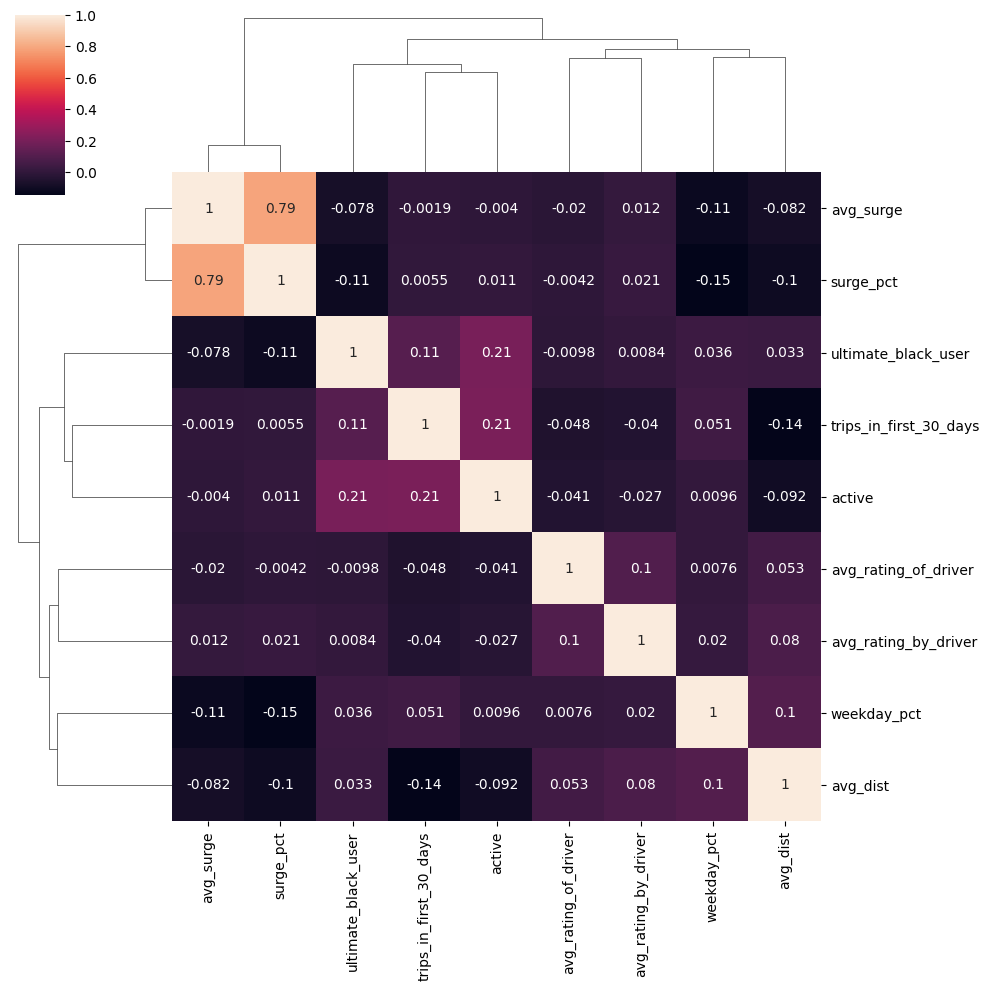

In [220]:
sns.clustermap(df.corr(), annot=True)
plt.savefig('./figures/part3-heatmap.png')

Small positive correlation between active users and those who take trips in the first 30 days.

### 2. Modeling

* Logistic Regression - simple classification
* Naive Bayes - simple classification
* Random Forest Classifier - Ensemble method
* Gradient Boosting Classifier - Ensemble method

In [179]:
# Scale
columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

# Subtract the mean, divide by standard deviation.
for col in columns:
    colMean = df[col].mean()
    colStdDev = df[col].std()
    df[col] = df[col].apply(lambda x : (x - colMean) / colStdDev) 

In [180]:
df.ultimate_black_user = df.ultimate_black_user.astype('float')

In [181]:
# Get dependent and independent features
X = df.drop(['active'], axis=1)
y = df.active.astype('float')
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city,phone
0,0.451632,0.087357,0.114852,0.329470,1.0,-0.397407,-0.375664,0.496829,1,1
1,-0.601231,0.609237,-0.337618,-0.444782,0.0,-0.294769,0.439998,0.496829,0,0
2,0.188416,-0.608484,-0.337618,-0.444782,0.0,1.055737,-0.891007,0.496829,0,1
3,1.767711,-0.086603,0.295841,0.560740,1.0,0.515534,-0.608457,0.273172,1,1
4,3.083790,-0.434524,0.522076,0.148476,0.0,0.580359,-0.471625,0.273172,2,0


In [182]:
# Splitting to train test dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(len(y_train), len(y_val))

37054 12352


In [183]:
# metric
from sklearn.metrics import f1_score

In [184]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 300)

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
f1_score(y_preds, y_val)

0.5120497538222337

In [185]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
f1_score(y_preds, y_val)

0.6100031993174789

In [186]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
f1_score(y_val, y_preds)

0.6763180639585133

In [187]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
f1_score(y_val, y_preds)

0.6712943186672362

In [188]:
from xgboost import XGBClassifier

model = XGBClassifier()

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
f1_score(y_val, y_preds)

0.7055393586005831